In [77]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import pypsa
import matplotlib.dates as mdates

In [8]:

base_dir1 = "C:/Users/margh/Desktop/distribution/pypsa-distribution" # Edit this string with the top of the path where you saved the pypsa-distribution folder

buildings_path = base_dir1+"/resources/buildings/microgrid_building.geojson"
buildings = gpd.read_file(buildings_path)
clustered_path = base_dir1+"/resources/buildings/clustered_buildings.geojson"
clustered = gpd.read_file(clustered_path)
network_path = base_dir1+"/networks/results/elec.nc"
network = pypsa.Network(network_path)
n=network


c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatibl

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x2bd8d96d690>,
 <matplotlib.collections.LineCollection at 0x2bd8d96eb90>)

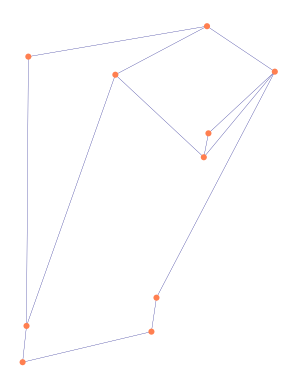

In [19]:
# NETWORK PLOT
n.plot(bus_sizes=0.00002, bus_colors="coral", line_colors="navy", line_widths=0.2, projection=ccrs.PlateCarree())

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x2bd92bf1bd0>,
 <matplotlib.collections.LineCollection at 0x2bd92bf31f0>)

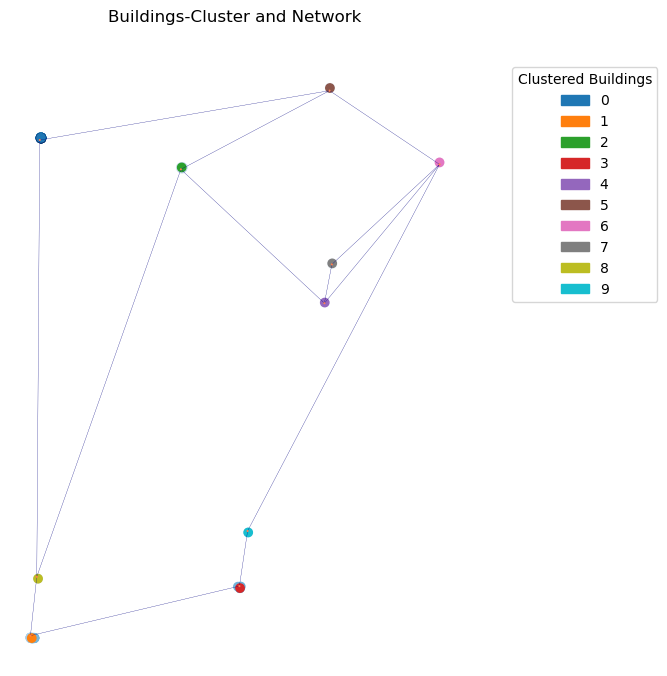

In [41]:
# PLOT BUILDING-CLUSTER AND NETWORK OVERLAPPING
fig, ax = plt.subplots(ncols=2, figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree()})

buildings.plot(ax=ax[0], legend=False, label='Buildings', cmap='Blues')
clustered.plot(ax=ax[0], legend=False, alpha=1, label='Clustered Buildings', cmap='tab10')
ax[0].set_frame_on(False)
ax[0].set_title("Buildings-Cluster and Network", y=1.05)

left1, bottom1, width1, height1 = 0.2, 0.2, 0.3, 0.8
ax[0].set_position([left1, bottom1, width1, height1])

cmap = cm.get_cmap('tab10')
clustered_labels = clustered['cluster'].unique()  # Sostituisci 'your_column' con il nome della colonna che determina i cluster
legend_handles = [mpatches.Patch(color=cmap(i), label=label) for i, label in enumerate(clustered_labels)]
ax[0].legend(handles=legend_handles, title='Clustered Buildings',loc='upper left', bbox_to_anchor=(1.1, 1))

# Posizionamento del subplot[1]
left2, bottom2, width2, height2 = 0.2, 0.2, 0.3, 0.8
ax[1].set_position([left2, bottom2, width2, height2])

n.plot(ax=ax[1], bus_sizes=0.0000009, bus_colors="coral", line_colors="navy", line_widths=0.2, projection=ccrs.PlateCarree())


c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


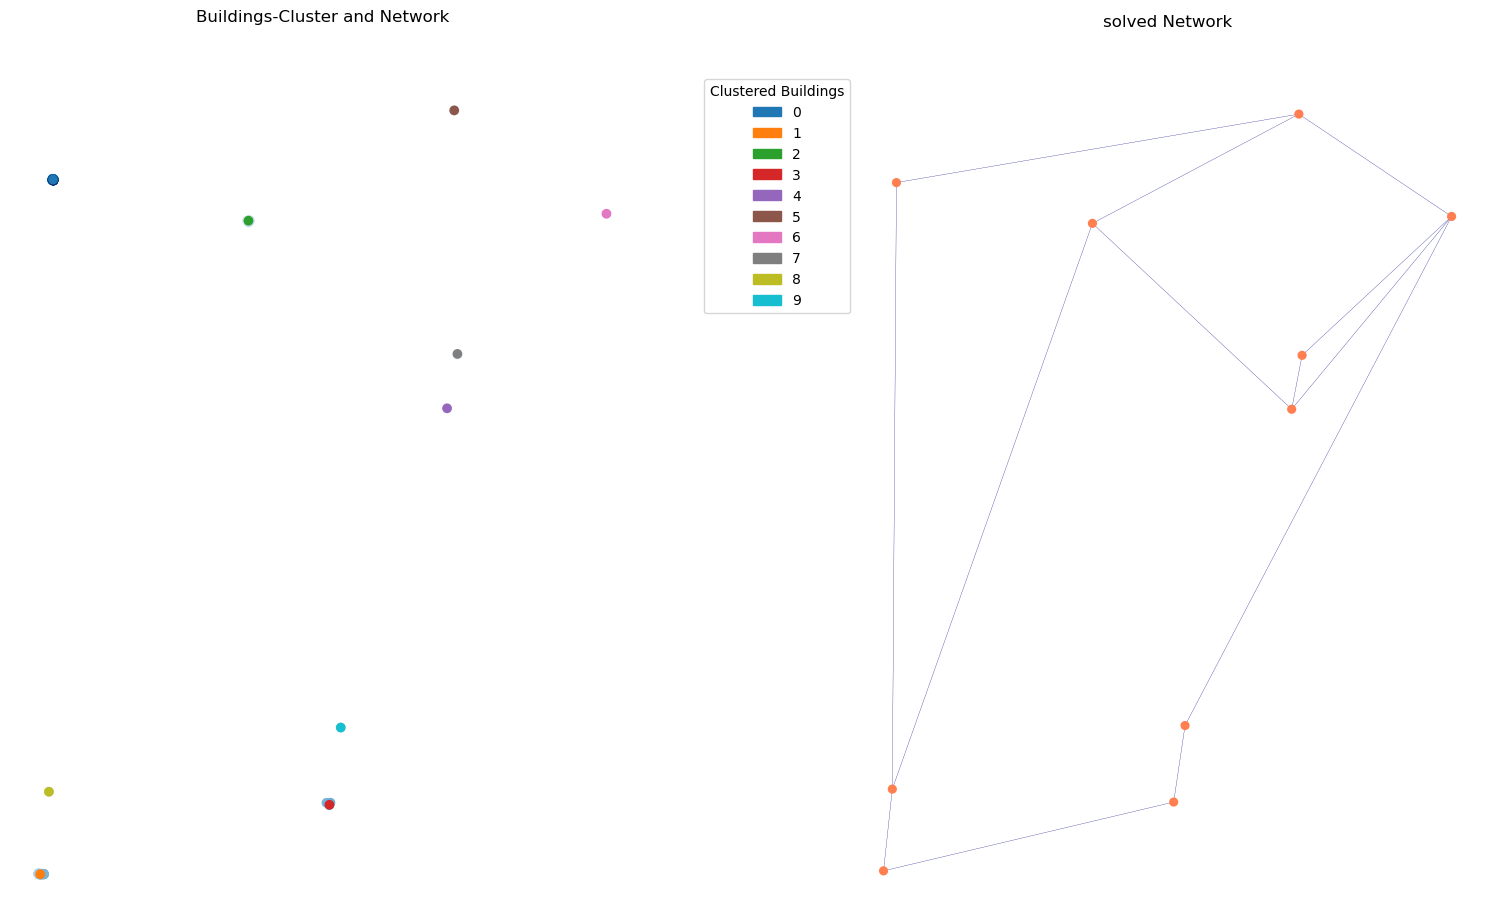

In [50]:
# PLOT BUILDING-CLUSTER AND NETWORK IN DIFFERENT SUBPLOT
fig, ax = plt.subplots(ncols=2, figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree()})

buildings.plot(ax=ax[0], legend=False, label='Buildings', cmap='Blues')
clustered.plot(ax=ax[0], legend=False, alpha=1, label='Clustered Buildings', cmap='tab10')
ax[0].set_frame_on(False)
ax[0].set_title("Buildings-Cluster and Network", y=1.05)

# left1, bottom1, width1, height1 = 0.2, 0.2, 0.3, 0.8
# ax[0].set_position([left1, bottom1, width1, height1])

cmap = cm.get_cmap('tab10')
clustered_labels = clustered['cluster'].unique()  # Sostituisci 'your_column' con il nome della colonna che determina i cluster
legend_handles = [mpatches.Patch(color=cmap(i), label=label) for i, label in enumerate(clustered_labels)]
ax[0].legend(handles=legend_handles, title='Clustered Buildings',loc='upper left', bbox_to_anchor=(1.1, 1))

# # Posizionamento del subplot[1]
# left2, bottom2, width2, height2 = 0.2, 0.3, 0.4, 0.5
# ax[1].set_position([left2, bottom2, width2, height2])

n.plot(ax=ax[1], bus_sizes=0.000009, bus_colors="coral", line_colors="navy", line_widths=0.2, projection=ccrs.PlateCarree())
ax[1].set_title("solved Network", y=1.05)
plt.tight_layout()

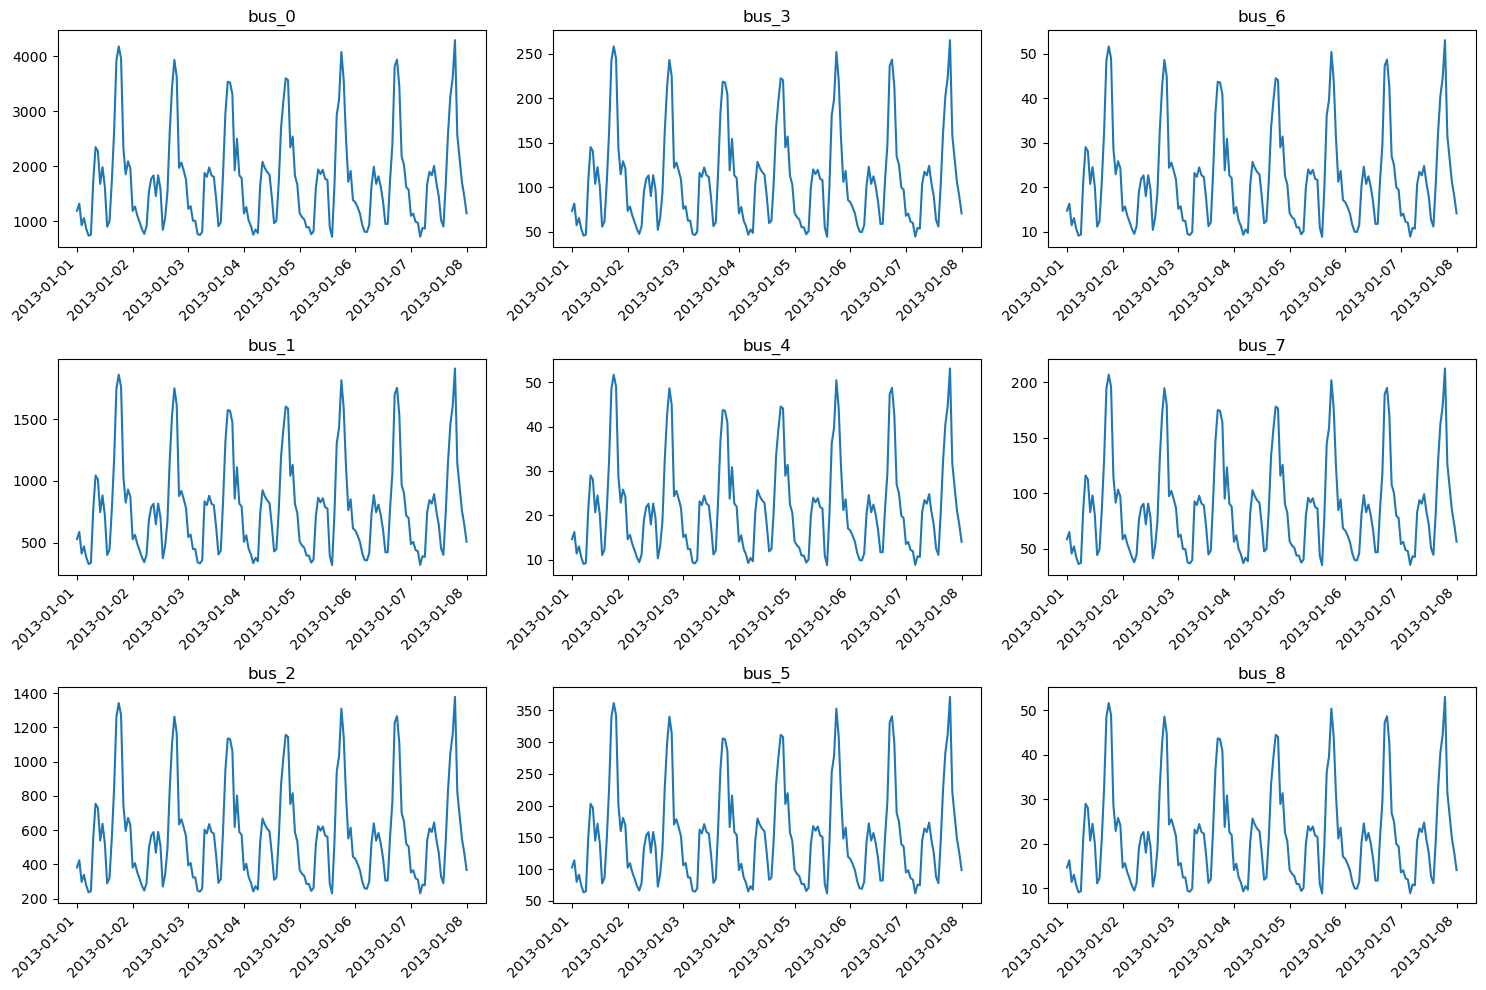

In [153]:
#PLOT OF LOAD FOR EACH BUS ( to be improved)
n_bus = n.loads_t.p_set.shape[1]
ncols = (n_bus + 1) // 3
nrows = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))



for i in range(n_bus):
    nome_bus= f"bus_{i}"
    data= n.loads_t.p_set.iloc[0:169,i]
    load_bus= pd.DataFrame(data)
    riga = i % 3
    colonna = i // 3
    ax[riga, colonna].plot(load_bus[nome_bus])
    ax[riga, colonna].set_title(nome_bus)
    plt.setp(ax[riga, colonna].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()